Project Assignment 3

MAPPING THE ESTIMATED POVERTY RATE OF THE UNITED STATES, 2023

# Description:
The 'Mapping the Estimated Poverty Rate of the United States, 2023' project aimed to analyze and visualize the poverty rate across states in the United States in 2023. Utilizing CyberGISX Notebook, this project calculated the 2023 U.S. poverty rate, comparing it to 2022's official poverty rate to discern trends. Additionally, this project identified states exceeding the average poverty rate and pinpointed the top five states with the highest poverty rates. 


# Background:
Poverty serves as a crucial socioeconomic metric, and comprehending how it is dispersed across the nation's landscapes can offer valuable insights into the economic well-being of communities and potential areas for targeted interventions. The U.S. Census Bureau announced the official poverty rate in 2022 was 11.5%, with 37.9 million people in poverty. 

# Read the data

In [1]:
%matplotlib inline
import os
from geopandas import GeoSeries, GeoDataFrame, read_file, gpd
from pandas import Series
from matplotlib import pyplot as plt
import IPython
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
total_pop = 'project/State.shp'
total_pop = gpd.read_file(total_pop)
total_pop[:3]

,ID,NAME,ST_ABBREV,STATE_NAME,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,...,PERC_WORKA,PERC_NOHSD,PERC_HSGRA,PERC_COLLE,PERC_OWNER,PERC_RENTE,PERC_VACAN,Shape__Are,Shape__Len,geometry
0,01,Alabama,AL,Alabama,5098606,4970917,127689,100.7,2052801,2.42,...,60.252665,11.124213,32.469333,37.567986,61.135901,26.511792,12.352307,1.898838e+11,3.381161e+06,"MULTIPOLYGON (((-9804827.172 3535998.323, -980..."
1,02,Alaska,AK,Alaska,732320,702029,30291,1.3,272068,2.58,...,62.370139,6.227315,28.664002,42.956445,53.502922,28.488984,18.008095,8.202573e+12,8.103864e+07,"MULTIPOLYGON (((-19938359.968 6674706.391, -19..."
2,04,Arizona,AZ,Arizona,7427991,7268090,159901,65.4,2832889,2.57,...,58.614907,9.868275,24.253297,43.880887,58.995037,29.658466,11.346497,4.340564e+11,2.907243e+06,"POLYGON ((-12314791.031 4439600.741, -12309722..."


In [3]:
poverty_pop = 'project/poverty_us_2023.shp'
poverty_pop = gpd.read_file(poverty_pop)
poverty_pop[:3]

,STATENS,GEOID,STUSPS,NAME,ALAND,AWATER,B17020_001,B17020_002,B17020_003,B17020_004,...,C17002_c_5,C17002_c_6,C17002_c_7,C17002_c_8,C17002_c_9,C17002__16,C17002__17,C17002__18,C17002__19,geometry
0,01779775,01,AL,Alabama,1.311755e+11,4.591898e+09,4876863,1677.0,769819,12595.0,...,0.145042,4.8,0.155419,6.8,0.182787,2.7,0.104325,64.9,0.352986,"MULTIPOLYGON (((-9805779.623 3536997.578, -980..."
1,01785533,02,AK,Alaska,1.478943e+12,2.453784e+11,719086,595.0,75016,2458.0,...,0.238761,3.9,0.328179,5.3,0.370305,2.1,0.182863,75.1,0.576424,"MULTIPOLYGON (((-19938361.670 6674706.152, -19..."
2,01779777,04,AZ,Arizona,2.943640e+11,8.558716e+08,6926281,1660.0,934911,13056.0,...,0.147132,4.5,0.138671,6.5,0.152310,2.9,0.094738,68.3,0.277719,"POLYGON ((-12138854.213 4438965.000, -12138854..."


# Data preparation

## Rename the attributes

In [4]:
total_pop = total_pop.rename(columns={'NAME':'States'})
total_pop = total_pop.rename(columns={'TOTPOP_CY':'Total_pop'})
total_pop[:3]

,ID,States,ST_ABBREV,STATE_NAME,Total_pop,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,...,PERC_WORKA,PERC_NOHSD,PERC_HSGRA,PERC_COLLE,PERC_OWNER,PERC_RENTE,PERC_VACAN,Shape__Are,Shape__Len,geometry
0,01,Alabama,AL,Alabama,5098606,4970917,127689,100.7,2052801,2.42,...,60.252665,11.124213,32.469333,37.567986,61.135901,26.511792,12.352307,1.898838e+11,3.381161e+06,"MULTIPOLYGON (((-9804827.172 3535998.323, -980..."
1,02,Alaska,AK,Alaska,732320,702029,30291,1.3,272068,2.58,...,62.370139,6.227315,28.664002,42.956445,53.502922,28.488984,18.008095,8.202573e+12,8.103864e+07,"MULTIPOLYGON (((-19938359.968 6674706.391, -19..."
2,04,Arizona,AZ,Arizona,7427991,7268090,159901,65.4,2832889,2.57,...,58.614907,9.868275,24.253297,43.880887,58.995037,29.658466,11.346497,4.340564e+11,2.907243e+06,"POLYGON ((-12314791.031 4439600.741, -12309722..."


In [5]:
poverty_pop = poverty_pop.rename(columns={'NAME': 'States'})
poverty_pop = poverty_pop.rename(columns={'B17020_003': 'Poverty_pop'})
poverty_pop[:3]


,STATENS,GEOID,STUSPS,States,ALAND,AWATER,B17020_001,B17020_002,Poverty_pop,B17020_004,...,C17002_c_5,C17002_c_6,C17002_c_7,C17002_c_8,C17002_c_9,C17002__16,C17002__17,C17002__18,C17002__19,geometry
0,01779775,01,AL,Alabama,1.311755e+11,4.591898e+09,4876863,1677.0,769819,12595.0,...,0.145042,4.8,0.155419,6.8,0.182787,2.7,0.104325,64.9,0.352986,"MULTIPOLYGON (((-9805779.623 3536997.578, -980..."
1,01785533,02,AK,Alaska,1.478943e+12,2.453784e+11,719086,595.0,75016,2458.0,...,0.238761,3.9,0.328179,5.3,0.370305,2.1,0.182863,75.1,0.576424,"MULTIPOLYGON (((-19938361.670 6674706.152, -19..."
2,01779777,04,AZ,Arizona,2.943640e+11,8.558716e+08,6926281,1660.0,934911,13056.0,...,0.147132,4.5,0.138671,6.5,0.152310,2.9,0.094738,68.3,0.277719,"POLYGON ((-12138854.213 4438965.000, -12138854..."


In [6]:
print(poverty_pop.columns)
print(total_pop.columns)

Index(['STATENS', 'GEOID', 'STUSPS', 'States', 'ALAND', 'AWATER', 'B17020_001',
       'B17020_002', 'Poverty_pop', 'B17020_004', 'B17020_005', 'B17020_006',
       'B17020_007', 'B17020_008', 'B17020_009', 'B17020__10', 'B17020__11',
       'B17020__12', 'B17020__13', 'B17020__14', 'B17020__15', 'B17020__16',
       'B17020__17', 'B17020__18', 'B17020_010', 'B17020__19', 'B17020_011',
       'B17020__20', 'B17020_012', 'B17020__21', 'B17020_013', 'B17020__22',
       'B17020_014', 'B17020__23', 'B17020_015', 'B17020__24', 'B17020_016',
       'B17020__25', 'B17020_017', 'B17020__26', 'B17020_cal', 'B17020_c_1',
       'B17020_c_2', 'B17020_c_3', 'B17020_c_4', 'B17020_c_5', 'Shape__Are',
       'Shape__Len', 'B17020_c_6', 'B17020_c_7', 'C17002_002', 'C17002_003',
       'C17002_004', 'C17002_005', 'C17002_006', 'C17002_007', 'C17002_008',
       'C17002_009', 'C17002__10', 'C17002__11', 'C17002__12', 'C17002__13',
       'C17002__14', 'C17002__15', 'C17002_cal', 'C17002_c_1', 'C17002_c

## Create a bar chart to show poverty population of each state

<Figure size 864x576 with 0 Axes>

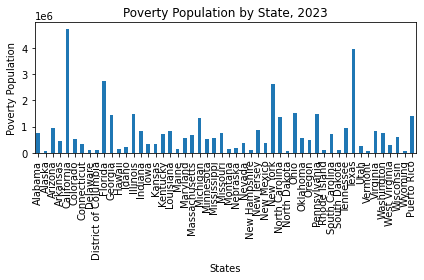

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Create a bar chart to show poverty population for each state
plt.figure(figsize=(12,8))
poverty_pop.plot.bar(x='States', y='Poverty_pop', legend=None)
plt.xlabel('States')
plt.ylabel('Poverty Population')
plt.title('Poverty Population by State, 2023')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

## Join the datasets together

In [8]:
total_pop.crs = poverty_pop.crs

# Perform an inner join based on the 'States' column
merged_populations = poverty_pop.merge(total_pop, on='States', how='inner')

# Display the first few rows of the merged GeoDataFrame to verify the join
merged_populations.head()

,STATENS,GEOID,STUSPS,States,ALAND,AWATER,B17020_001,B17020_002,Poverty_pop,B17020_004,...,PERC_WORKA,PERC_NOHSD,PERC_HSGRA,PERC_COLLE,PERC_OWNER,PERC_RENTE,PERC_VACAN,Shape__Are_y,Shape__Len_y,geometry_y
0,01779775,01,AL,Alabama,1.311755e+11,4.591898e+09,4876863,1677.0,769819,12595.0,...,60.252665,11.124213,32.469333,37.567986,61.135901,26.511792,12.352307,1.898838e+11,3.381161e+06,"MULTIPOLYGON (((-9804827.172 3535998.323, -980..."
1,01785533,02,AK,Alaska,1.478943e+12,2.453784e+11,719086,595.0,75016,2458.0,...,62.370139,6.227315,28.664002,42.956445,53.502922,28.488984,18.008095,8.202573e+12,8.103864e+07,"MULTIPOLYGON (((-19938359.968 6674706.391, -19..."
2,01779777,04,AZ,Arizona,2.943640e+11,8.558716e+08,6926281,1660.0,934911,13056.0,...,58.614907,9.868275,24.253297,43.880887,58.995037,29.658466,11.346497,4.340564e+11,2.907243e+06,"POLYGON ((-12314791.031 4439600.741, -12309722..."
3,00068085,05,AR,Arkansas,1.346608e+11,3.121950e+09,2923735,1020.0,468113,8062.0,...,59.279771,10.207925,35.205226,34.904755,57.623065,29.776736,12.600199,2.054028e+11,2.683084e+06,"POLYGON ((-10503535.097 4369606.658, -10503414..."
4,01779778,06,CA,California,4.036718e+11,2.029357e+10,38701352,3861.0,4741175,41071.0,...,61.878353,14.095767,21.614179,46.340204,52.005259,41.329172,6.665569,6.491796e+11,8.059338e+06,"MULTIPOLYGON (((-13048031.362 3865261.112, -13..."


## Create a new attibute and calculate poverty rate

In [9]:
# Perform the division and create a new column 'Poverty_Rate'
merged_populations['Poverty_rate'] = round(merged_populations['Poverty_pop'] / merged_populations['Total_pop'] * 100,2)

# Display the first few rows of the GeoDataFrame to verify the new column

merged_populations_gdf = gpd.GeoDataFrame(merged_populations, geometry='geometry_y')
merged_populations_gdf.head()

,STATENS,GEOID,STUSPS,States,ALAND,AWATER,B17020_001,B17020_002,Poverty_pop,B17020_004,...,PERC_NOHSD,PERC_HSGRA,PERC_COLLE,PERC_OWNER,PERC_RENTE,PERC_VACAN,Shape__Are_y,Shape__Len_y,geometry_y,Poverty_rate
0,01779775,01,AL,Alabama,1.311755e+11,4.591898e+09,4876863,1677.0,769819,12595.0,...,11.124213,32.469333,37.567986,61.135901,26.511792,12.352307,1.898838e+11,3.381161e+06,"MULTIPOLYGON (((-9804827.172 3535998.323, -980...",15.10
1,01785533,02,AK,Alaska,1.478943e+12,2.453784e+11,719086,595.0,75016,2458.0,...,6.227315,28.664002,42.956445,53.502922,28.488984,18.008095,8.202573e+12,8.103864e+07,"MULTIPOLYGON (((-19938359.968 6674706.391, -19...",10.24
2,01779777,04,AZ,Arizona,2.943640e+11,8.558716e+08,6926281,1660.0,934911,13056.0,...,9.868275,24.253297,43.880887,58.995037,29.658466,11.346497,4.340564e+11,2.907243e+06,"POLYGON ((-12314791.031 4439600.741, -12309722...",12.59
3,00068085,05,AR,Arkansas,1.346608e+11,3.121950e+09,2923735,1020.0,468113,8062.0,...,10.207925,35.205226,34.904755,57.623065,29.776736,12.600199,2.054028e+11,2.683084e+06,"POLYGON ((-10503535.097 4369606.658, -10503414...",15.32
4,01779778,06,CA,California,4.036718e+11,2.029357e+10,38701352,3861.0,4741175,41071.0,...,14.095767,21.614179,46.340204,52.005259,41.329172,6.665569,6.491796e+11,8.059338e+06,"MULTIPOLYGON (((-13048031.362 3865261.112, -13...",11.89


## Calculate average poverty rate of US and compare it with the official poverty rate in 2022

In [10]:
# To calculate mean poverty rate of the United States in 2023 and compare it with 2023
mean_2023_poverty_rate = round(merged_populations_gdf['Poverty_rate'].mean(),2)
print("Mean Poverty Rate for the United States:", mean_2023_poverty_rate,"%.")

poverty_rate_2022 = 11.5

# Calculate the change in poverty rate from 2022 to 2023
poverty_rate_change = mean_2023_poverty_rate - poverty_rate_2022

# Compare the change with the given threshold
if poverty_rate_change > 0:
    print(f"The poverty rate increases by {poverty_rate_change:.2f} percentage from 2022 to 2023.")
    print("This is higher than the 2022 poverty rate.")
elif poverty_rate_change < 0:
    print(f"The poverty rate decreases by {-poverty_rate_change:.2f} percentage from 2022 to 2023.")
    print("This is lower than the 2022 poverty rate.")
else:
    print("The poverty rate remains the same from 2022 to 2023.")

Mean Poverty Rate for the United States: 11.86 %.
The poverty rate increases by 0.36 percentage from 2022 to 2023.
This is higher than the 2022 poverty rate.


# Mapping and Visualization

## Continental US poverty rate

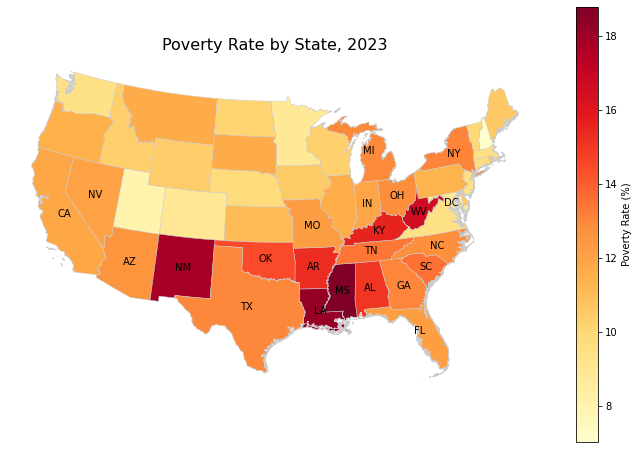

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Remove rows for Alaska (AK) and Hawaii (HI)
continental_us_gdf = merged_populations_gdf[~merged_populations_gdf['STUSPS'].isin(['AK', 'HI'])]

continental_us_gdf = continental_us_gdf.to_crs(epsg=5070)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the GeoDataFrame using 'Poverty_Rate' column for coloring
continental_us_gdf.plot(column='Poverty_rate', cmap='YlOrRd', linewidth=0.5, edgecolor='0.8', 
                        legend=True, ax=ax, legend_kwds={'label': "Poverty Rate (%)", 'orientation': "vertical"})

# Annotate states with poverty rate greater than 14%
high_poverty_states = continental_us_gdf[continental_us_gdf['Poverty_rate'] > 11.86]
for x, y, label in zip(high_poverty_states.geometry.centroid.x, high_poverty_states.geometry.centroid.y, high_poverty_states['STUSPS']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Set a clear title for the map
ax.set_title('Poverty Rate by State, 2023', fontsize=16)

# Display the map
plt.axis('off') 
plt.show()


## Alaska poverty rate

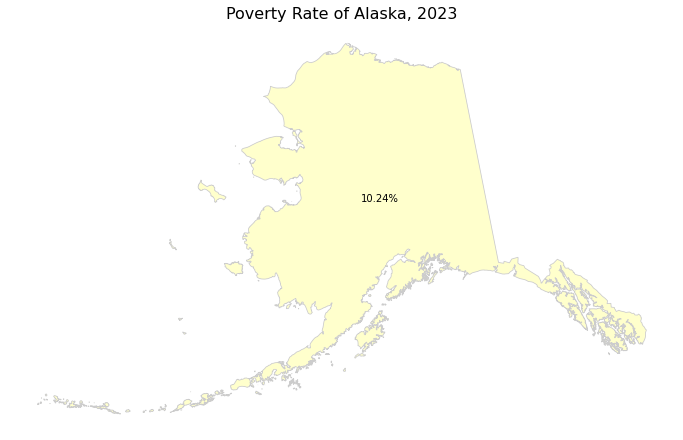

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter rows for Alaska (AK)
alaska_gdf = merged_populations_gdf[merged_populations_gdf['STUSPS'] == 'AK'].copy()  # Use the copy() method

# Round the 'Poverty_rate' column to 2 decimal points
alaska_gdf['Poverty_rate_rounded'] = alaska_gdf['Poverty_rate'].round(2)

# Create a plot for Alaska with Alaska Albers Equal Area Conic projection (EPSG:3338)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
alaska_gdf = alaska_gdf.to_crs(epsg=3338)  # Change the projection to Alaska Albers Equal Area Conic

# Plot the GeoDataFrame for Alaska using 'Poverty_rate_rounded' column for labeling
alaska_gdf.plot(column='Poverty_rate_rounded', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', 
                legend=False, ax=ax)

# Add labels with rounded poverty rates and percentage sign for each state
for x, y, label in zip(alaska_gdf.geometry.centroid.x, alaska_gdf.geometry.centroid.y, alaska_gdf['Poverty_rate_rounded']):
    ax.text(x, y, f"{label}%", fontsize=10, ha='center', va='center')

# Set a clear title for the map
ax.set_title('Poverty Rate of Alaska, 2023', fontsize=16)

# Display the map without axis
plt.axis('off') 
plt.show()

## Hawaii poverty rate

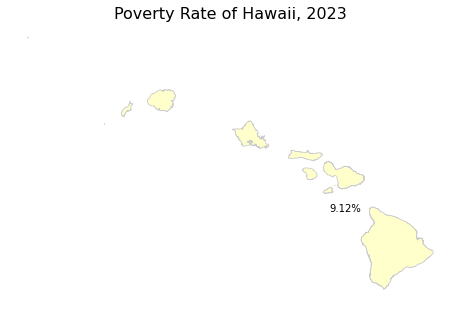

In [16]:
# Filter rows for Hawaii (HI)
hawaii_gdf = merged_populations_gdf[merged_populations_gdf['STUSPS'] == 'HI'].copy()  # Use the copy() method

# Round the 'Poverty_rate' column to 2 decimal points
hawaii_gdf['Poverty_rate_rounded'] = hawaii_gdf['Poverty_rate'].round(2)

# Create a plot for Hawaii with Hawaii Albers Equal Area Conic projection (EPSG:102007)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hawaii_gdf = hawaii_gdf.to_crs(epsg=32604)  # Change the projection to Hawaii Albers Equal Area Conic

# Plot the GeoDataFrame for Hawaii using 'Poverty_rate_rounded' column for labeling
hawaii_gdf.plot(column='Poverty_rate_rounded', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', 
                legend=False, ax=ax)

# Add labels with rounded poverty rates and percentage sign for Hawaii
for x, y, label in zip(hawaii_gdf.geometry.centroid.x, hawaii_gdf.geometry.centroid.y, hawaii_gdf['Poverty_rate_rounded']):
    ax.text(x, y, f"{label}%", fontsize=10, ha='center', va='center')

# Set a clear title for the map
ax.set_title('Poverty Rate of Hawaii, 2023', fontsize=16)

# Display the map without axis
plt.axis('off') 
plt.show()

## Top five states with highest poverty rate in the U.S.

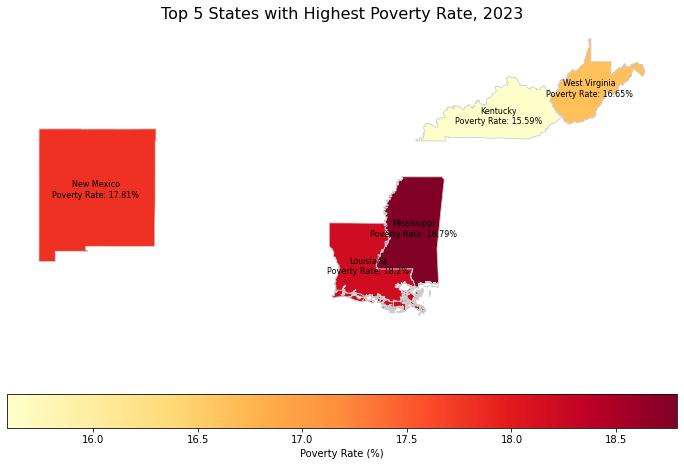

In [17]:
# Sort the GeoDataFrame by 'Poverty_rate' column in descending order and select the top 5 states
top_5_states = merged_populations_gdf.sort_values(by='Poverty_rate', ascending=False).head(5)

# Create the choropleth map for the top 5 states with highest poverty rates
continental_us_gdf = continental_us_gdf.to_crs(epsg=5070)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the top 5 states using 'Poverty_rate' column for coloring
top_5_states.plot(column='Poverty_rate', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', 
                  legend=True, ax=ax, legend_kwds={'label': "Poverty Rate (%)", 'orientation': "horizontal"})

# Add labels and rounded poverty rates for the top 5 states
for x, y, label, rate in zip(top_5_states.geometry.centroid.x, top_5_states.geometry.centroid.y, top_5_states['States'], top_5_states['Poverty_rate']):
    ax.text(x, y, f"{label}\nPoverty Rate: {round(rate, 2)}%", fontsize=8, ha='center', va='center')

# Set a clear title for the map
ax.set_title('Top 5 States with Highest Poverty Rate, 2023', fontsize=16)

# Display the map
plt.axis('off') 
plt.show()

# Results:


## The estimated average poverty rate in 2023 is 11.86%, increased by 0.36 percentage compared to the official poverty rate of the United States in 2022.

## There are 23 states in the United States have a poverty rate higher than the estimated average poverty rate. 

## Most of the states in the southern part and eastern part of the United States have a poverty rate higher than the estimated average poverty rate.

## The top five states with highest poverty rate are New Mexico, Louisiana, Mississippi, Kentucky and West Virgina. These states might require increased social welfare programs and economic development initiatives from the government to address the rising poverty rates. 